# Career Foundry Exercise 6.4 - Supervised Machine Learning: Regression
#### Gabriel Pollicar, December 22 , 2023

### _________________________________________________________________

## Contents List:

### - 2. Importing Libraries and Datasets
### - 3. Cleaning Data
### - 4. Explore Data Visually
### - 5. State Hypothesis
### - 6. Reshape Variables into Numpy
### - 7. Split data into two sets
### - 8. Run a linear regression on the data
#### -     Training Set
#### -     Test Set
### - 9. Create a Plot showing Regression
### - 10. Interpretation of Results
### - 11. Check Model Performance
### - 12. Comparing predicted vs actual y values
### - 13. Reflections on model performance

### - 

### - Exporting Datasets

### _________________________________________________________________


## 2. Importing Libraries

In [7]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy
import folium 
import json
import geopandas as gpd

# Modules from Scikit-learn
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

 # Here is where you import the k-means algorithm from scikit-learn.
from sklearn.cluster import KMeans 
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

## Importing Datasets

In [3]:
# Importing the realtor data 
# This dataset holds all initial columns remaining from the dataset at the end of Part I, 
path = r'C:\Users\polli\Career Foundry Python'
realtor_data = pd.read_csv(os.path.join(path, 'Exercise 6.1','02 Data', 'realtor-data_Cleaned.csv'))

In [454]:
realtor_data.shape

(73963, 10)

In [6]:
# fix extra column
realtor_data = realtor_data.drop('Unnamed: 0', axis=1)
realtor_data.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,4.0,3.0,0.46,San Sebastian,Puerto Rico,612.0,2520.0,NaN,179000.0


## 3. Cleaning Data

In [8]:
realtor_data.isnull().sum()

status                0
bed                   0
bath                  0
acre_lot              0
city                  0
state                 0
zip_code              0
house_size            0
prev_sold_date    28772
price                 0
dtype: int64

In [10]:
realtor_data.duplicated().shape

(73963,)

In [19]:
# This data cleaning was completed in Exercise 6.3 where I removed the outlier groups of large 
## multifamily apartment properties from the dataset by restricting to only upper middle class properties
## This limits are properties with less that 1 acre in acreage size, less than $1M in price, and less 
## than 4000 sqft in floor space. 

realtor_data_clean1 = realtor_data[realtor_data['price'] < 1000000]
realtor_data_clean2 = realtor_data_clean1[realtor_data_clean1['acre_lot'] < 1]
realtor_data_clean3 = realtor_data_clean2[realtor_data_clean2['house_size'] < 4000]

In [24]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
realtor_data_clean3.describe()

,bed,bath,acre_lot,zip_code,house_size,price
count,49298.00,49298.00,49298.00,49298.00,49298.00,49298.00
mean,3.43,2.19,0.24,10037.56,1750.37,382750.02
std,1.23,0.91,0.22,5232.78,690.34,228319.39
min,1.00,1.00,0.00,601.00,122.00,3900.00
25%,3.00,2.00,0.09,6484.00,1229.00,200000.00
50%,3.00,2.00,0.17,10301.00,1608.00,329900.00
75%,4.00,3.00,0.33,13126.00,2154.00,525000.00
max,21.00,12.00,0.99,95000.00,3998.00,999999.00


#
## 4. Explore Data Visually
# _____________________________________________________________________________________________________

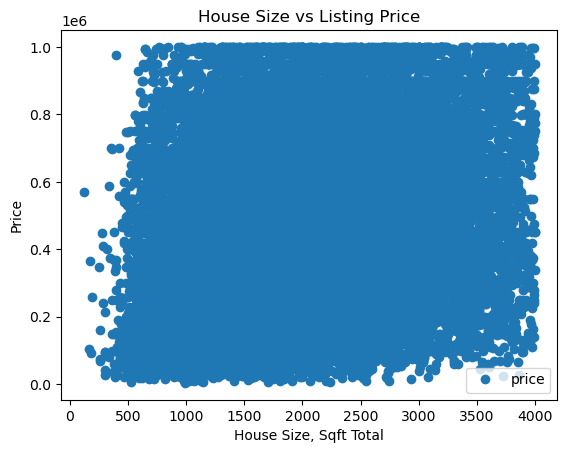

In [180]:
# This code generates a scatterplot to view the relationship between house size(floor size) with price of property
realtor_data_clean3.plot(x = 'house_size', y='price',style='o')
plt.title('House Size vs Listing Price')  
plt.xlabel('House Size, Sqft Total')  
plt.ylabel('Price')  
plt.show()

# The result of the scatterplot shows too much variance and no correlation between the variables. 
## This could be because of differences between the prices in different states, 
## ie houses in New York will cost more than same size houses in Puerto Rico 

In [66]:
# This creates a subset of the dataset to house properties only in New Jersey, for middle class homes

realtor_data_clean_Jersey = realtor_data_clean3[realtor_data_clean3['state'] == 'New Jersey']

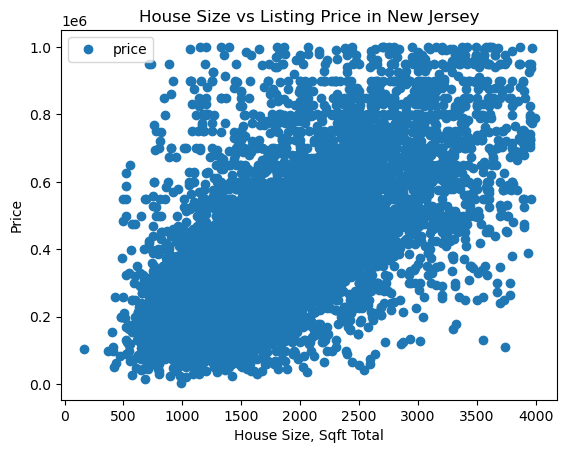

In [181]:
# This code creates a scatterplot for house prices over house size for NJ only. 
realtor_data_clean_Jersey.plot(x = 'house_size', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('House Size vs Listing Price in New Jersey')  
plt.xlabel('House Size, Sqft Total')  
plt.ylabel('Price')  
plt.show()

# The result shows a little more clearer relationship between variables 
# This supports previous hypothesis stated from Exercise 6.3 where States were a variable that impacted housing price. 

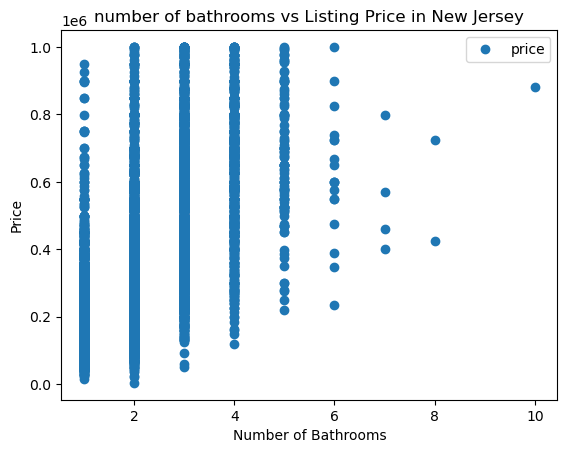

In [457]:
# This code creates a scatterplot for house prices over number of bathrooms for NJ properties only. 
realtor_data_clean_Jersey.plot(x = 'bath', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('number of bathrooms vs Listing Price in New Jersey')  
plt.xlabel('Number of Bathrooms')  
plt.ylabel('Price')  
plt.show()

# The result shows that there are some 
# This was previously shown in earlier analysis as well, 

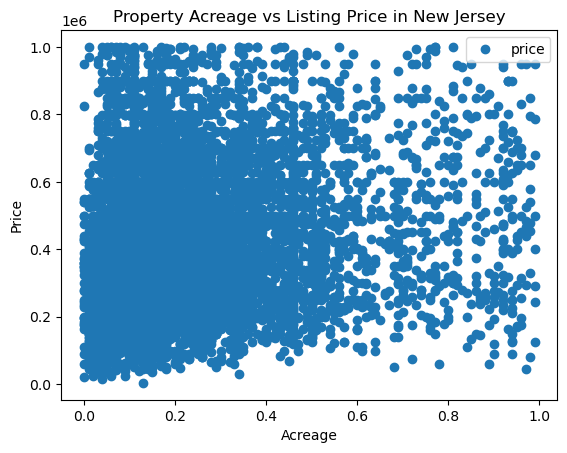

In [183]:
# This code creates a scatterplot for house prices over house acreage for NJ only. 
realtor_data_clean_Jersey.plot(x = 'acre_lot', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Property Acreage vs Listing Price in New Jersey')  
plt.xlabel('Acreage')  
plt.ylabel('Price')  
plt.show()

# The result shows that acre lot sizes still do not have a strong correlation with listing price
# This was previously shown in earlier analysis as well, 

#
## 5. Hypothesis 
#

#### My hypothesis is that there will be a correlation between the price of the property and its house size, therefore, we would be able to reasonably predict, the price of the house based from its square footage. I would analyze properties in the same state to remove other factors that would alter the price such as state taxes, schools, services etc. 

#
## 6. Reshape Variables into Numpy Arrays
#

In [28]:
X = realtor_data_clean_Jersey['house_size'].values.reshape(-1,1)
y = realtor_data_clean_Jersey['price'].values.reshape(-1,1)#

In [32]:
y

array([[333490.],
       [339900.],
       [305100.],
       ...,
       [179900.],
       [229900.],
       [750000.]])

#
## 7. Split Data into Two Sets
#

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


#
## 8. Run a Linear Regression 
#

In [34]:
regression = LinearRegression()

#### - Fit the model to the Training Set

In [35]:
regression.fit(X_train, y_train)

LinearRegression()

#### - Creating a prediction Y on the test set

In [37]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

#
## 9. Create a Plot that shows Regression Line
#

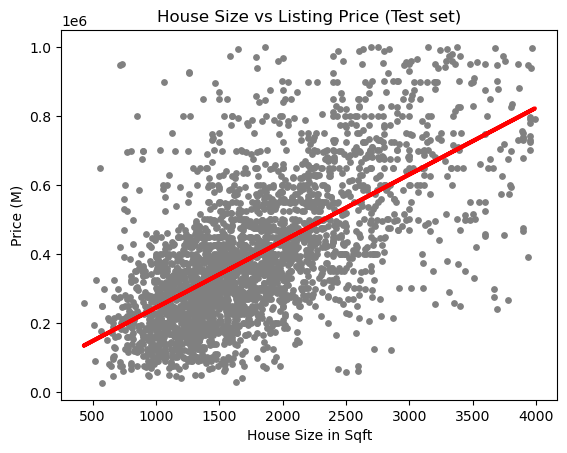

In [194]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('House Size vs Listing Price (Test set)')
plot_test.xlabel('House Size in Sqft')
plot_test.ylabel('Price (M)')
plot_test.show()

#
## 10. Intepretation of the Regression Line
#

### Interpretation:

The line seems to fit well with the bulk of the data points. The outliers seem to not affect the overall trend line as it shows to follow the general increasing trend of house prices to house size. This is expected that the larger the house is, the higher the price would be generally. There are still many outliers not accounted for because of the many variables considering housing price. Many variables such as environmental (crime rates, schools, services) and other house variables (number of bedrooms, baths), these have not been accounted for yet. 


#
## 11. Check the Model Performance Statistics - MSE and R2 Score
#

In [187]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

# Output all summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

# The result shows a mean squared error of 24 million which is extremely high, this can be attributed to
## the high amounts of large errors from outliers. 
## The r2 score also shows 

Slope: [[193.06293201]]
Mean squared error:  24391388897.4591
R2 score:  0.4073529573929394


#
## 12. Compare the Predicted Y values with actual y values
#

In [199]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(10)

,Actual,Predicted
0,365000.00,383788.23
1,310000.00,336680.88
2,275000.00,189953.05
3,499000.00,359848.43
4,340000.00,228179.51
5,75000.00,377996.35
6,359900.00,328958.36
7,295000.00,404832.09
8,650000.00,379154.72
9,275000.00,297682.17


In [196]:
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [197]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [198]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[193.06293201]]
Mean squared error:  24011128836.104237
R2 score:  0.41669649094344785


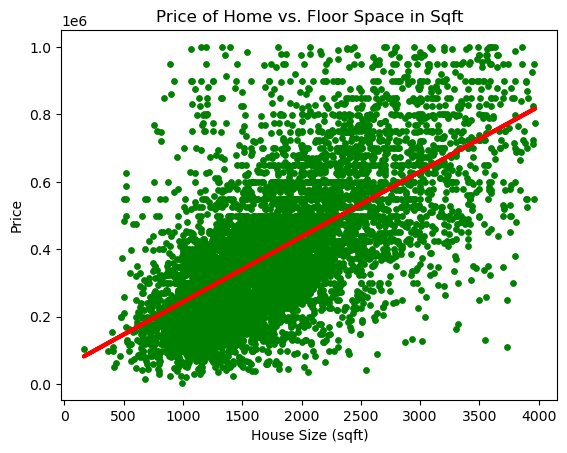

In [206]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Price of Home vs. Floor Space in Sqft')
plot_test.xlabel('House Size (sqft)')
plot_test.ylabel('Price')
plot_test.show()

In [203]:
# This code finds the average error between each Actual and Predicted Value, 
# This was used to investigate why the mean squared error was so high. 
data['diff'] = pd.Series.abs(data['Actual'] - data['Predicted'])

avgError = data.loc[:, 'diff'].mean()
print(avgError)

# The result shows that on average, the predicted value was off by $100k dollars which is very high 

118156.61405848265


### Observation:

It seems that the high mean squared error is due to the high errors between the predicted price and the expected price. According to the dataframe, the differences seem to be an average of 120,000 dollars for each price prediction. This could explain why the mean squared error is so high. Another large factor would be the errors resulting from the outliers which would further increase the MSE. Removing these outliers can reduce the error and get a better r2 score. 


#
## 13. Thoughts on Model Performance
#

It seems that the data was insufficient for producing a reliable model to predict housing prices based on house size. This was expected from the previous exercise where we measured the correlation between housing price and size. There seems to be other factors involved that drastically increase and decrease the price of house based on the same sqft size. This is because we still see outliers on both sides of the regression line. 

The summary statistics were poor because of the many outliers that still exist in this data. The Next step would be to further isolate house size as a variable by removing the causes of outliers, such as properties with large number of beds, baths and differences in rural and urban pricing.
# 
#### New Hypothesis:
The price of middle class housing can be better modeled and predicted by separating rural properties from the dataset because large rural properties have large acreages and are farther away from urban centers which can affect the price. I could use population density to measure urbanization of specific zip codes and separate both prices for both urban and rural housing. I could also measure properties specifically for single family homes by subsetting for a more specific range of beds and baths. 

# 
### New Analysis: Regression by Specific State and for Urban Areas Only
# __________________________________________________________________________________

In [48]:
# For this new hypothesis, I need more demographic variables such as population density to determine which 
## zip code is a high density urban area, or low dense rural area. This can then be used further subset the data. 

# Importing the zip code census data 
# This data was taken from https://simplemaps.com/data/us-zips, they source their data from credible sourcess:
# U.S. Postal Service™, U.S. Census Bureau, National Weather Service, American Community Survey, and the IRS.
path2 = r"C:\Users\polli\Career Foundry Python\Hello World\Example 6\simplemaps_uszips_basicv1.83\uszips.csv"
zips = pd.read_csv(os.path.join(path2))

In [49]:
zips.head()

# This shows the data I have imported, many columns are not needed, but after checking zip codes to county names 
## seems to confirm that the data is valid. 

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,601,18.18,-66.75,Adjuntas,PR,Puerto Rico,True,NaN,17126.00,102.60,72001,Adjuntas,"{""72001"": 98.73, ""72141"": 1.27}",Adjuntas|Utuado,72001|72141,False,False,America/Puerto_Rico
1,602,18.36,-67.18,Aguada,PR,Puerto Rico,True,NaN,37895.00,482.50,72003,Aguada,"{""72003"": 100}",Aguada,72003,False,False,America/Puerto_Rico
2,603,18.46,-67.12,Aguadilla,PR,Puerto Rico,True,NaN,49136.00,552.40,72005,Aguadilla,"{""72005"": 99.76, ""72099"": 0.24}",Aguadilla|Moca,72005|72099,False,False,America/Puerto_Rico
3,606,18.17,-66.94,Maricao,PR,Puerto Rico,True,NaN,5751.00,50.10,72093,Maricao,"{""72093"": 82.27, ""72153"": 11.66, ""72121"": 6.06}",Maricao|Yauco|Sabana Grande,72093|72153|72121,False,False,America/Puerto_Rico
4,610,18.29,-67.12,Anasco,PR,Puerto Rico,True,NaN,26153.00,272.10,72011,Añasco,"{""72011"": 96.7, ""72099"": 2.81, ""72083"": 0.37, ...",Añasco|Moca|Las Marías|Aguada,72011|72099|72083|72003,False,False,America/Puerto_Rico


In [54]:
zips2 = zips.drop(columns=['state_id', 'zcta', 'parent_zcta', 'county_names_all', 'imprecise', 'military', 
                           'timezone'])

In [55]:
zips2.head()

,zip,lat,lng,city,state_name,population,density,county_fips,county_name,county_weights,county_fips_all
0,601,18.18,-66.75,Adjuntas,Puerto Rico,17126.00,102.60,72001,Adjuntas,"{""72001"": 98.73, ""72141"": 1.27}",72001|72141
1,602,18.36,-67.18,Aguada,Puerto Rico,37895.00,482.50,72003,Aguada,"{""72003"": 100}",72003
2,603,18.46,-67.12,Aguadilla,Puerto Rico,49136.00,552.40,72005,Aguadilla,"{""72005"": 99.76, ""72099"": 0.24}",72005|72099
3,606,18.17,-66.94,Maricao,Puerto Rico,5751.00,50.10,72093,Maricao,"{""72093"": 82.27, ""72153"": 11.66, ""72121"": 6.06}",72093|72153|72121
4,610,18.29,-67.12,Anasco,Puerto Rico,26153.00,272.10,72011,Añasco,"{""72011"": 96.7, ""72099"": 2.81, ""72083"": 0.37, ...",72011|72099|72083|72003


In [74]:
# This code changes the zip code column in the main dataset to allow merging with the zip code dataset.

realtor_data_clean_Jersey['zip_code'] = realtor_data_clean_Jersey['zip_code'].astype('int64')

C:\Users\polli\AppData\Local\Temp\ipykernel_54436\2329790245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  realtor_data_clean_Jersey['zip_code'] = realtor_data_clean_Jersey['zip_code'].astype('int64')


In [77]:
zips2 = zips2.rename(columns={'zip': 'zip_code'})

In [213]:
# Merging both datasets together

realtor_data_Jersey_merged = pd.merge(realtor_data_clean_Jersey, zips2, on='zip_code')

In [214]:
realtor_data_Jersey_merged.head()

,status,bed,bath,acre_lot,city_x,state,zip_code,house_size,prev_sold_date,price,lat,lng,city_y,state_name,population,density,county_fips,county_name,county_weights,county_fips_all
0,for_sale,3.00,3.00,0.07,Burlington,New Jersey,8016,1500.00,NaN,333490.00,40.07,-74.83,Burlington,New Jersey,34433.00,614.70,34005,Burlington,"{""34005"": 100}",34005
1,for_sale,4.00,2.00,0.26,Burlington,New Jersey,8016,1764.00,2018-07-17,279000.00,40.07,-74.83,Burlington,New Jersey,34433.00,614.70,34005,Burlington,"{""34005"": 100}",34005
2,for_sale,3.00,2.00,0.22,Burlington,New Jersey,8016,1988.00,2016-10-24,299000.00,40.07,-74.83,Burlington,New Jersey,34433.00,614.70,34005,Burlington,"{""34005"": 100}",34005
3,for_sale,3.00,2.00,0.20,Burlington,New Jersey,8016,1764.00,2020-08-23,275000.00,40.07,-74.83,Burlington,New Jersey,34433.00,614.70,34005,Burlington,"{""34005"": 100}",34005
4,for_sale,5.00,2.00,0.05,Burlington,New Jersey,8016,2104.00,2007-01-24,219900.00,40.07,-74.83,Burlington,New Jersey,34433.00,614.70,34005,Burlington,"{""34005"": 100}",34005


In [215]:
# This code checks for any missed entries in the dataset where the state from the zip code column is null
## which means no zip code was matched during merging. 
miss = realtor_data_Jersey_merged[realtor_data_Jersey_merged['state'] 
                                  != realtor_data_Jersey_merged['state_name']]
miss.size


# Result shows that each property entry had a matching state zip code in New Jersey

0

In [216]:
miss2 = realtor_data_Jersey_merged[realtor_data_Jersey_merged['city_x'] != 
                                   realtor_data_Jersey_merged['city_y']]

miss2[miss2['city_y'] == 'Trenton'].head()

# Considering Trenton and Hamilton are 3 miles from each other, and that Trenton is a subcounty of Hamilton,
## we can assume that this merge was relatively valid, and gives us an approximate insight on pop density of each property. 

,status,bed,bath,acre_lot,city_x,state,zip_code,house_size,prev_sold_date,price,lat,lng,city_y,state_name,population,density,county_fips,county_name,county_weights,county_fips_all
4167,for_sale,4.00,1.00,0.20,Hamilton,New Jersey,8610,1064.00,2006-06-21,280000.00,40.19,-74.72,Trenton,New Jersey,32159.00,1669.20,34021,Mercer,"{""34021"": 94.37, ""34005"": 5.63}",34021|34005
4168,for_sale,2.00,1.00,0.19,Hamilton,New Jersey,8610,1138.00,2012-09-26,219999.00,40.19,-74.72,Trenton,New Jersey,32159.00,1669.20,34021,Mercer,"{""34021"": 94.37, ""34005"": 5.63}",34021|34005
4169,for_sale,4.00,2.00,0.14,Hamilton,New Jersey,8610,1597.00,2004-03-05,299000.00,40.19,-74.72,Trenton,New Jersey,32159.00,1669.20,34021,Mercer,"{""34021"": 94.37, ""34005"": 5.63}",34021|34005
4170,for_sale,3.00,1.00,0.04,Hamilton,New Jersey,8610,1100.00,2014-07-01,125000.00,40.19,-74.72,Trenton,New Jersey,32159.00,1669.20,34021,Mercer,"{""34021"": 94.37, ""34005"": 5.63}",34021|34005
4171,for_sale,3.00,2.00,0.05,Hamilton,New Jersey,8610,1564.00,2010-04-14,189000.00,40.19,-74.72,Trenton,New Jersey,32159.00,1669.20,34021,Mercer,"{""34021"": 94.37, ""34005"": 5.63}",34021|34005


In [217]:
# Cleans redundant columns

realtor_data_Jersey_merged = realtor_data_Jersey_merged.drop(columns=['city_x', 'state'])

In [428]:
# The result of the merger was a dataset with population density attribute for each property listing.
# Now, I can create a subset data of listings with population densities for urban properties only
# 500 was determined by definition of rural vs urban from the Department of Agriculture Source:
## https://www.ers.usda.gov/topics/rural-economy-population/rural-classifications/what-is-rural/#:~:text=This%20delineation%20of%20built%2Dup,with%20fewer%20than%202%2C500%20people.

sub = realtor_data_Jersey_merged[realtor_data_Jersey_merged['density'] >= 500]
sub.shape

(6268, 18)

In [415]:
# Next I further created a subset with stricter limits of acreage and number of bath and bed rooms, 
## For my hypothesis I am measuring single family, middle class homes. These values reflect the 
## maximum variables for what is expected in average homes, Source:
# Source: https://www.visualcapitalist.com/cp/the-median-lot-size-in-every-american-state-2022/

sub3 = sub[sub['acre_lot'] <= .25]
sub4 = sub3[(sub3['bath'] <= 3) & (sub3['bed'] <= 4)]

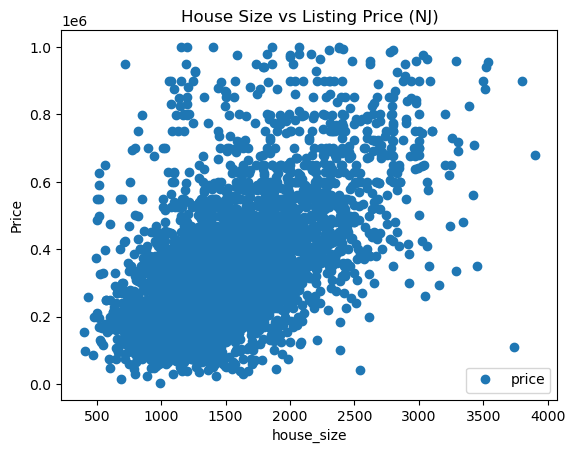

In [417]:
# This code creates a plot of house size and listing price 

sub4.plot(x = 'house_size', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('House Size vs Listing Price (NJ)')  
plt.xlabel('house_size')  
plt.ylabel('Price')  
plt.show()

In [418]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = sub4['house_size'].values.reshape(-1,1)
y = sub4['price'].values.reshape(-1,1)

# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit the regression object onto the training set.
regression = LinearRegression() 
regression.fit(X_train, y_train)

# Predict the values of y using X.
y_predicted = regression.predict(X_test)

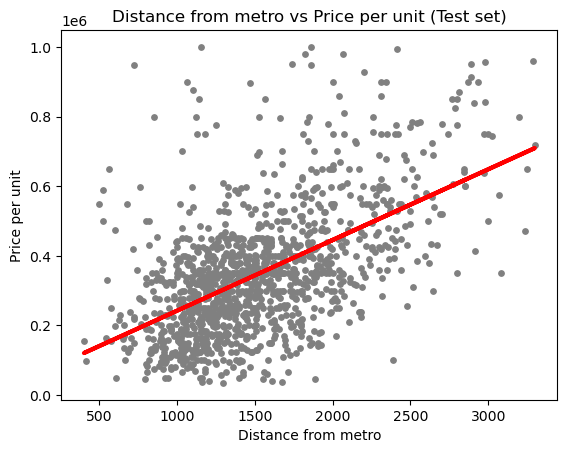

In [419]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Distance from metro vs Price per unit (Test set)')
plot_test.xlabel('Distance from metro')
plot_test.ylabel('Price per unit')
plot_test.show()

In [420]:
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[202.95325394]]
Mean squared error:  22931475175.87554
R2 score:  0.3037079722826449


In [421]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(10)

,Actual,Predicted
0,649000.00,617064.04
1,318900.00,407007.43
2,99911.00,319128.67
3,799000.00,349165.75
4,979000.00,409848.77
5,259000.00,245050.73
6,244500.00,269811.03
7,229000.00,295383.14
8,345000.00,298427.43
9,325000.00,208925.05


In [422]:
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [423]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[202.95325394]]
Mean squared error:  21385351771.248753
R2 score:  0.3221443073310326


#### Observation: 

I attempted to isolate the house size variable by subsetting the data according to similar numbers of bathrooms, bedrooms, acreage lot size, and population density. However, this did not help to improve the model. I separated the rural areas and measured only urban and suburban areas with population densities higher than 500 people/km2. I then subsetted the data further by limiting the number of bedrooms/bathrooms by 3, and limiting the acreage lots for large properties to .2 acres. 

The result showed an R2 score of .32 with 20 billion as the mean squared error. This was not an improvement from earlier R2 score which shows that there are still other variables that are greatly affecting listing price which are not represented in the model.

Next steps would be to find more variables to improve the model or find other reasonable ways to further subset the data to remove outliers without introducing unwanted bias. 

### Other Hypothesis: 
The number of bathrooms can be used to predict the listing price of properties. From previous exercise, it was shown that number of bathrooms had the highest correlation with listing price. 

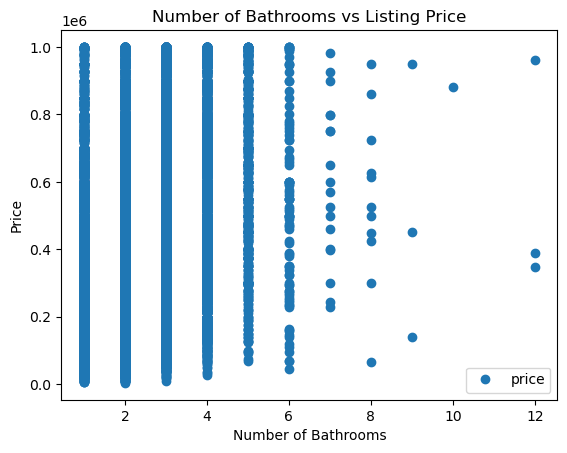

In [429]:
# This is another regression model analysis that looks at using number of bathrooms to predict housing prices. 

realtor_data_clean3.plot(x = 'bath', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number of Bathrooms vs Listing Price')  
plt.xlabel('Number of Bathrooms')  
plt.ylabel('Price')  
plt.show()

In [436]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = realtor_data_clean3['bath'].values.reshape(-1,1)
y = realtor_data_clean3['price'].values.reshape(-1,1)

# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit the regression object onto the training set.
regression = LinearRegression() 
regression.fit(X_train, y_train)

# Predict the values of y using X.
y_predicted = regression.predict(X_test)

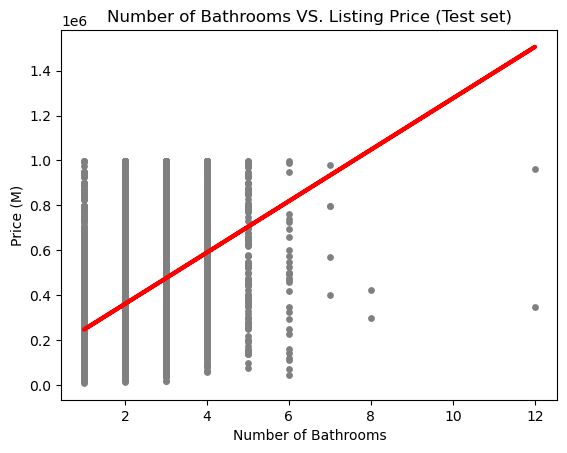

In [444]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of Bathrooms VS. Listing Price (Test set)')
plot_test.xlabel('Number of Bathrooms')
plot_test.ylabel('Price (M)')
plot_test.show()

In [438]:
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[114385.47952977]]
Mean squared error:  40661999833.10911
R2 score:  0.2071854454535511


In [439]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(10)

,Actual,Predicted
0,129900.00,361677.93
1,155000.00,247292.45
2,89000.00,361677.93
3,859000.00,476063.41
4,285000.00,361677.93
5,819900.00,476063.41
6,285000.00,247292.45
7,295000.00,361677.93
8,279900.00,247292.45
9,599000.00,476063.41


In [440]:
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [441]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[114385.47952977]]
Mean squared error:  41736857703.36905
R2 score:  0.2047863465017049


#### Observation:

It seems that number of bathrooms in the property also is not a reliable variable in solely predicting the listing price for a house. MSE is still large and R2 has a very low correlation. It seems that a combination of multiple variables is used to accurately predict the listing price for a home. I would assume this includes external and internal factors of the house. 
### 
Next steps would be to further add other variables such as crime rates, distance to schools/ public services, and add more house data such as recent remodels, garage space etc. This can help improve the performance of the model to determine which main variables are most effective in influencing a properties listing price. 

In [407]:
# Some code I found online to further investigate why correlation values are so low
# This supposedely creates a regression model based on multiple variables, I used this to investigate if
## all the continuous variables in the dataset are enough to reliably predict listing prices. 
import pandas
from sklearn import linear_model

realtor_data_Jersey_merged

X = realtor_data_Jersey_merged[['bed', 'bath', 'acre_lot', 'density', 'house_size', 'population']]
y = realtor_data_Jersey_merged['price']

regr = linear_model.LinearRegression()
regr.fit(X, y)

#predict the price of a property by inserting its variables into the model to get a predicted Price.
# variables taken from realtor_data_Jersey_merged dataset row 1
predictedPrice = regr.predict([[4, 2, .26, 614.7, 1764, 34433.00]])

print(predictedPrice)

[369726.88279332]


C:\Users\polli\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [408]:
# Example I used to generate a predicted value. Actual price value shown is $279,000
realtor_data_Jersey_merged.iloc[[1]]

,status,bed,bath,acre_lot,zip_code,house_size,prev_sold_date,price,lat,lng,city_y,state_name,population,density,county_fips,county_name,county_weights,county_fips_all
1,for_sale,4.00,2.00,0.26,8016,1764.00,2018-07-17,279000.00,40.07,-74.83,Burlington,New Jersey,34433.00,614.70,34005,Burlington,"{""34005"": 100}",34005


#### Observation:

In the above code, I used a linear regression model that took in multiple variables at a time. I used all available continuous variables such as acre lot size, population density, and house size to improve the fit of the model. 

After fitting the data, I tested the regression by using it to predict the price based on 1 of the listed properties as an example. The result predicted a price of 371k while the actual price was 279k. The 100k error difference further supports the results of the analysis. This shows that the variables in the dataset are still insufficient at providing a comprehensive model for prediciting house listing price. 

Maybe more external variables such as local crime rate, school quality, tax rates, etc. can be further examined. Also variables relating to the property itself, garage space, roofing quality, sustainability, recent improvements etc. can help improve the model. 

## Exporting Dataset

In [447]:
# Merging datasets

realtor_data_clean3['zip_code'] = realtor_data_clean3['zip_code'].astype('int64')
realtor_data_clean_merged = pd.merge(realtor_data_clean3, zips2, on='zip_code')

C:\Users\polli\AppData\Local\Temp\ipykernel_54436\2580516566.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  realtor_data_clean3['zip_code'] = realtor_data_clean3['zip_code'].astype('int64')


In [456]:
realtor_data_clean_merged.describe()

# Some population and pop density data is missing from zip2 dataset

,bed,bath,acre_lot,zip_code,house_size,price,lat,lng,population,density,county_fips
count,49262.00,49262.00,49262.00,49262.00,49262.00,49262.00,49262.00,49262.00,49236.00,49236.00,49262.00
mean,3.43,2.19,0.24,10039.52,1750.36,382802.60,40.85,-73.86,28414.32,2059.37,32913.39
std,1.23,0.91,0.22,5216.94,690.29,228294.19,3.80,2.17,19913.19,3432.29,11962.94
min,1.00,1.00,0.00,601.00,122.00,3900.00,17.73,-109.60,0.00,0.00,9110.00
25%,3.00,2.00,0.09,6484.00,1229.00,200000.00,40.09,-75.09,13269.00,238.00,34001.00
50%,3.00,2.00,0.17,10302.00,1608.00,329900.00,41.23,-74.07,25637.00,818.60,36027.00
75%,4.00,3.00,0.33,13126.00,2154.00,525000.00,42.37,-72.94,39122.00,2412.40,36103.00
max,21.00,12.00,0.99,82414.00,3998.00,999999.00,47.33,-64.71,130352.00,58289.60,78030.00


In [452]:
# Exporting final dataset
path = r'C:\Users\polli\Career Foundry Python'
realtor_data_clean_merged.to_csv(os.path.join(path,'Exercise 6.4','02 Data', 'realtor-data_Cleaned.csv'))